1) Analisar a covariancia dos textos como um todo. O que é esperado: que algumas regioes tenham alta covariancia para textos que pertencem a mesma classe.

2) Analisar a covariancia entre os textos da mesma classes e verificar o mesmo do ponto 1

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [54]:
def plot_correlation_matrix(matrix):
    corr_matrix = np.corrcoef(matrix)
    plt.figure()
    sns.heatmap(corr_matrix, cmap='RdYlGn')
    
#     return corr_matrix



In [41]:
from utils import *
import re
from pprint import pprint
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

numRemover = NumRemover();
all_data = numRemover.fit_transform(get_data_from_db())
Xtrain, Xtest, Ytrain, Ytest = train_test_split(all_data, all_data["labels"], train_size = 0.7, random_state = 42, stratify = all_data["labels"])

In [39]:
# Como checar a quantidade de elementos de cada classe 
a = Ytest.where(Ytest == "NE").dropna()
len(a)

102

## Avaliando com UniGrams
Todos os textos

<IPython.core.display.Javascript object>


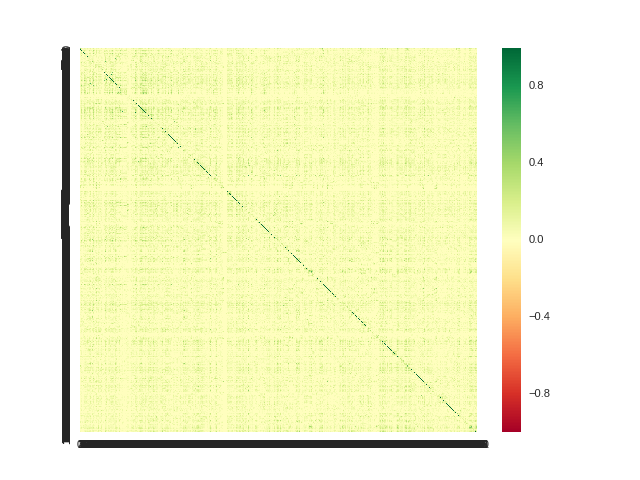

In [55]:
unigramCV = CountVectorizer(stop_words=stopwords.words("portuguese"))
M = unigramCV.fit_transform(all_data["texts"])

plot_correlation_matrix(M.toarray())

Textos positivos

Texto Positivos


<IPython.core.display.Javascript object>


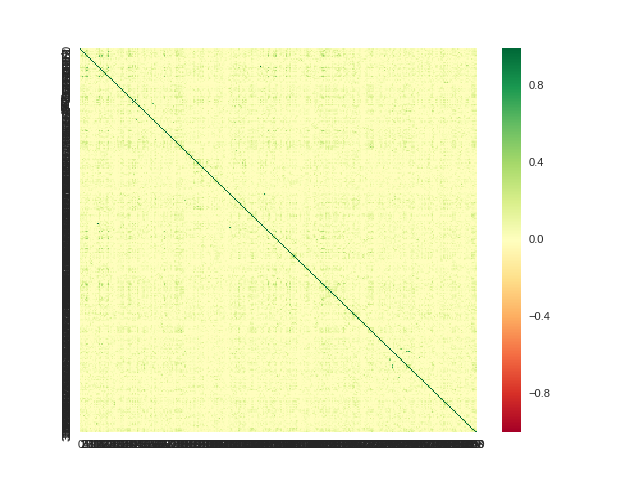

Texto Negativos


<IPython.core.display.Javascript object>


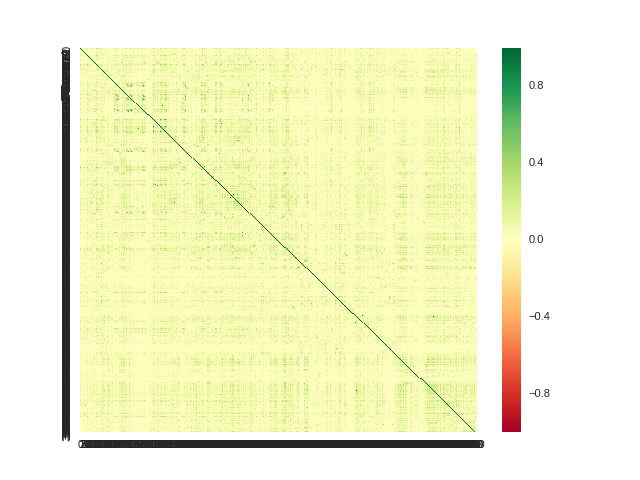

Texto Neutros


<IPython.core.display.Javascript object>


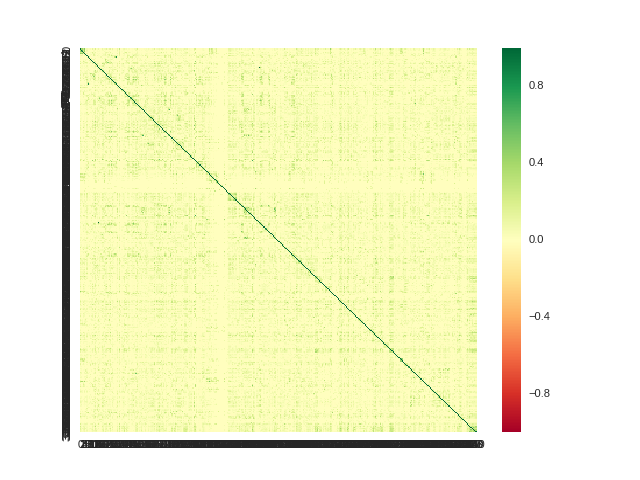

In [57]:
unigramCV = CountVectorizer(stop_words=stopwords.words("portuguese"))
data = get_data_from_db(sentiment="PO")
M = unigramCV.fit_transform(data["texts"])
print("Texto Positivos")
plot_correlation_matrix(M.toarray())

data = get_data_from_db(sentiment="NG")
M = unigramCV.fit_transform(data["texts"])
print("Texto Negativos")
plot_correlation_matrix(M.toarray())

data = get_data_from_db(sentiment="NE")
M = unigramCV.fit_transform(data["texts"])
print("Texto Neutros")
plot_correlation_matrix(M.toarray())

## Avaliando Bigrams

<IPython.core.display.Javascript object>


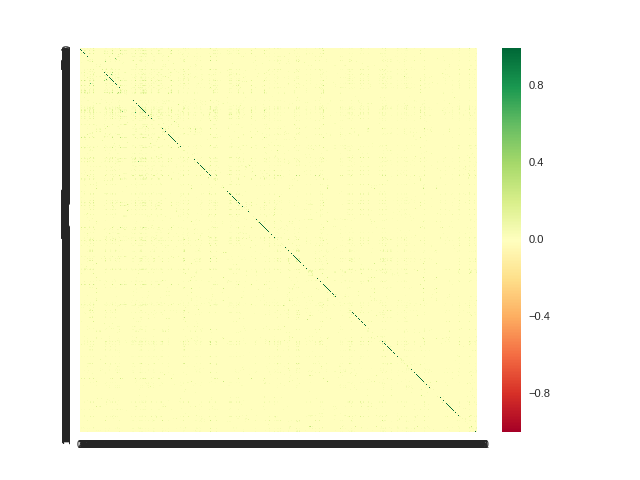

In [58]:
unigramCV = CountVectorizer(ngram_range=(2,2), stop_words=stopwords.words("portuguese"))
M = unigramCV.fit_transform(all_data["texts"])

plot_correlation_matrix(M.toarray())

Texto Positivos


<IPython.core.display.Javascript object>


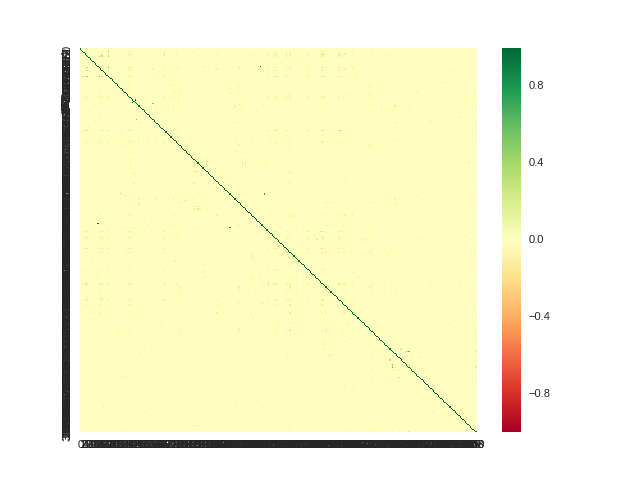

Texto Negativos


<IPython.core.display.Javascript object>


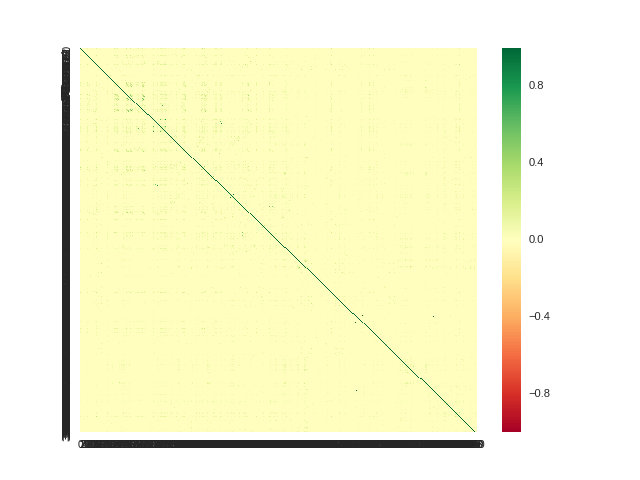

Texto Neutros


<IPython.core.display.Javascript object>


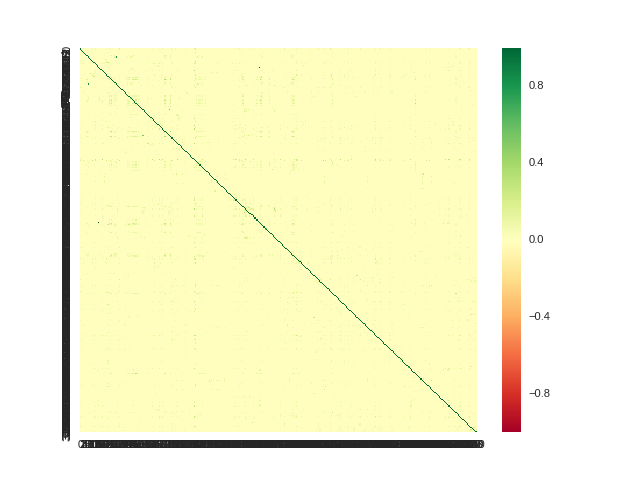

In [59]:
unigramCV = CountVectorizer(ngram_range=(2,2), stop_words=stopwords.words("portuguese"))

data = get_data_from_db(sentiment="PO")
M = unigramCV.fit_transform(data["texts"])
print("Texto Positivos")
plot_correlation_matrix(M.toarray())

data = get_data_from_db(sentiment="NG")
M = unigramCV.fit_transform(data["texts"])
print("Texto Negativos")
plot_correlation_matrix(M.toarray())

data = get_data_from_db(sentiment="NE")
M = unigramCV.fit_transform(data["texts"])
print("Texto Neutros")
plot_correlation_matrix(M.toarray())

## Unigrams + Bigrams

Texto Positivos


<IPython.core.display.Javascript object>


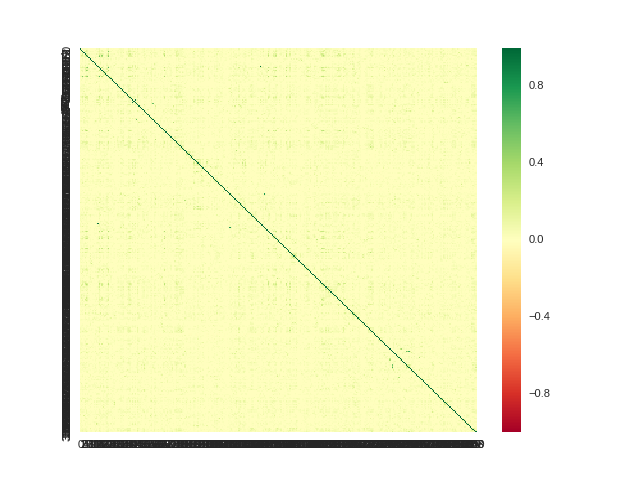

Texto Negativos


<IPython.core.display.Javascript object>


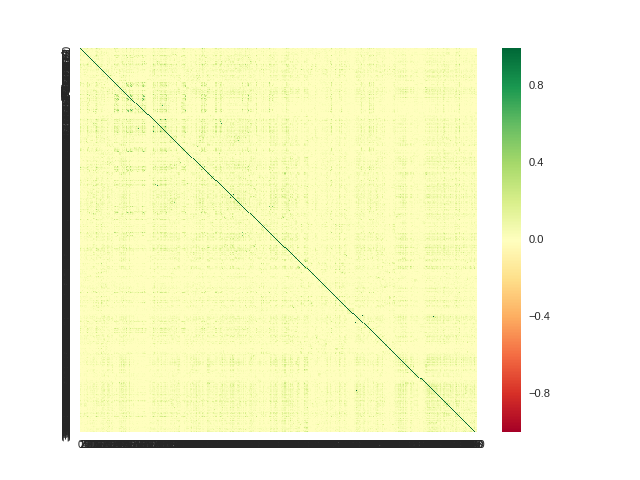

Texto Neutros


<IPython.core.display.Javascript object>


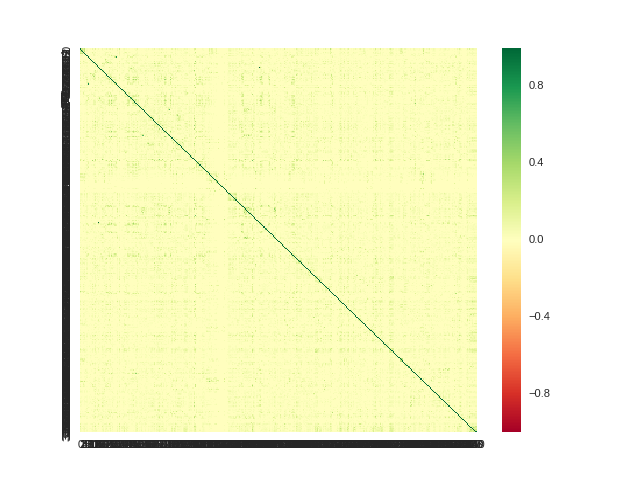

In [60]:
unigramCV = CountVectorizer(ngram_range=(1,2), stop_words=stopwords.words("portuguese"))

data = get_data_from_db(sentiment="PO")
M = unigramCV.fit_transform(data["texts"])
print("Texto Positivos")
plot_correlation_matrix(M.toarray())

data = get_data_from_db(sentiment="NG")
M = unigramCV.fit_transform(data["texts"])
print("Texto Negativos")
plot_correlation_matrix(M.toarray())

data = get_data_from_db(sentiment="NE")
M = unigramCV.fit_transform(data["texts"])
print("Texto Neutros")
plot_correlation_matrix(M.toarray())

## Utilizando os ngrams exclusivos
